## Problem set 3

Disha_Patel

200582202

### Question 1

Step 1. Import the necessary libraries 

In [251]:
import pandas as pd

Step 2. Import the dataset from this address.

In [252]:
data = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

Step 3. Assign it to a variable called users 


In [253]:
users = pd.read_csv(data, sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Step 4. Discover what is the mean age per occupation 


In [254]:
mean_age_per_occ= users.groupby('occupation')['age'].mean()
print("Mean Age per occupation is as below:", mean_age_per_occ)

Mean Age per occupation is as below: occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


Step 5. Discover the Male ratio per occupation and sort it from the most to the least 


In [255]:
users['is_male'] = users['gender'].map({'M': 1, 'F': 0})


male_ratio_by_occ = users.groupby('occupation')['is_male'].mean().sort_values(ascending=False)

print("Male Ratio per Occupation (sorted):", male_ratio_by_occ)


Male Ratio per Occupation (sorted): occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: is_male, dtype: float64


Step 6. For each occupation, calculate the minimum and maximum ages 


In [256]:
# Group by 'occupation' and calculate the minimum and maximum age for each group
age_range_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])


print("Minimum and Maximum Ages per Occupation:")
print(age_range_per_occupation.to_string(header=True, index=True, formatters={'min': '{:.0f}'.format, 'max': '{:.0f}'.format}))


Minimum and Maximum Ages per Occupation:
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60


Step 7. For each combination of occupation and sex, calculate the mean age 


In [257]:
# Calculate the average age by grouping data by 'occupation' and 'gender'
avg_age_by_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean()

avg_age_pivoted = avg_age_by_occupation_gender.unstack()

print("Average Age by Occupation and Gender:")
print(avg_age_pivoted.applymap(lambda x: f'{x:,.1f}'))


Average Age by Occupation and Gender:
gender            F     M
occupation               
administrator  40.6  37.2
artist         30.3  32.3
doctor          nan  43.6
educator       39.1  43.1
engineer       29.5  36.6
entertainment  31.0  29.0
executive      44.0  38.2
healthcare     39.8  45.4
homemaker      34.2  23.0
lawyer         39.5  36.2
librarian      40.0  40.0
marketing      37.2  37.9
none           36.5  18.6
other          35.5  34.0
programmer     32.2  33.2
retired        70.0  62.5
salesman       27.0  38.6
scientist      28.3  36.3
student        20.8  22.7
technician     38.0  33.0
writer         37.6  35.3


C:\Users\drash\AppData\Local\Temp\ipykernel_31724\3915393240.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(avg_age_pivoted.applymap(lambda x: f'{x:,.1f}'))


Step 8. For each occupation present the percentage of women and men 


In [258]:
# Calculate the count of each gender per occupation
gender_counts = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)

# Calculate the percentage of each gender in each occupation
gender_percentage = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100


print("Gender Percentage per Occupation (female and male):")
print(gender_percentage.applymap(lambda x: f'{x:,.2f}%'))


Gender Percentage per Occupation (female and male):
gender              F        M
occupation                    
administrator  45.57%   54.43%
artist         46.43%   53.57%
doctor          0.00%  100.00%
educator       27.37%   72.63%
engineer        2.99%   97.01%
entertainment  11.11%   88.89%
executive       9.38%   90.62%
healthcare     68.75%   31.25%
homemaker      85.71%   14.29%
lawyer         16.67%   83.33%
librarian      56.86%   43.14%
marketing      38.46%   61.54%
none           44.44%   55.56%
other          34.29%   65.71%
programmer      9.09%   90.91%
retired         7.14%   92.86%
salesman       25.00%   75.00%
scientist       9.68%   90.32%
student        30.61%   69.39%
technician      3.70%   96.30%
writer         42.22%   57.78%


C:\Users\drash\AppData\Local\Temp\ipykernel_31724\1153404531.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(gender_percentage.applymap(lambda x: f'{x:,.2f}%'))


### QUESION 2

Step 1. Import the necessary libraries 


In [259]:
import pandas as pd

Step 2. Import the dataset from this address 


In [260]:
data = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

Step 3. Assign it to a variable called euro12 


In [261]:
euro12 = pd.read_csv(data)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


Step 4. Select only the Goal column 


In [262]:
goal_column = euro12['Goals']
goal_column

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5. How many team participated in the Euro2012? 


In [263]:
# Get the number of unique teams in the dataset
team_count = euro12['Team'].nunique()

print("Total number of teams that participated  are:", team_count)


Total number of teams that participated  are: 16


Step 6. What is the number of columns in the dataset? 


In [264]:
# Get the number of columns in the dataset
column_count = euro12.shape[1]

print("Total number of columns are:", column_count)


Total number of columns are: 35


step 7. View only the columns Team, Yellow Cards and Red Cards and assign them 
to a dataframe called discipline 

In [265]:
# Select columns related to discipline (team, yellow cards, and red cards)
disciplinary_stats = euro12[['Team', 'Yellow Cards', 'Red Cards']]


print(disciplinary_stats)


                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


Step 8. Sort the teams by Red Cards, then to Yellow Cards 


In [266]:
# Sort the teams by red and yellow cards in ascending order
teams_sorted_by_discipline = disciplinary_stats.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[True, True])

print(teams_sorted_by_discipline)


                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1


Step 9. Calculate the mean Yellow Cards given per Team 

In [267]:
# Calculate the average number of yellow cards per team
average_yellow_cards = euro12['Yellow Cards'].mean()

print("Average Yellow Cards per Team:", round(average_yellow_cards, 2))


Average Yellow Cards per Team: 7.44


Step 10. Filter teams that scored more than 6 goalsStep 

In [268]:
# Filter teams with more than 6 goals
high_scoring_teams = euro12[euro12['Goals'] > 6]

high_scoring_teams


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


step 11. Select the teams that start 
with G 

In [269]:
# Filter teams whose names start with the letter 'G'
teams_with_G = euro12[euro12['Team'].str.startswith('G')]

teams_with_G


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12. Select the first 7 columns 


In [270]:
# Select the first 7 columns from the dataset
first_seven_columns = euro12.iloc[:, :7]

first_seven_columns


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Step 13. Select all columns except the last 3 


In [271]:
# Select all columns except the last three
all_columns_excluding_last_three = euro12.iloc[:, :-3]

all_columns_excluding_last_three


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russia 


In [272]:
# Filter data for specific teams and select the 'Team' and 'Shooting Accuracy' columns
shooting_accuracy_for_teams = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]

shooting_accuracy_for_teams


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


### Question 3 

Step 1. Import the necessary libraries 


In [273]:
import pandas as pd
import numpy as np

Step 2. Create 3 differents Series, each of length 100, as follows: 
• The first a random number from 1 to 4 
• The second a random number from 1 to 3 
• The third a random number from 10,000 to 30,000 

In [274]:
np.random.seed(0)  # Ensures reproducibility

series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))


Step 3. Create a DataFrame by joinning the Series by column 


In [275]:
housing_df = pd.concat([series1, series2, series3], axis=1)
housing_df.head()


,0,1,2
0,1,2,15021
1,4,3,11134
2,2,1,26409
3,1,1,19680
4,4,3,27340


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter 


In [276]:
housing_df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
housing_df.head()



,bedrs,bathrs,price_sqr_meter
0,1,2,15021
1,4,3,11134
2,2,1,26409
3,1,1,19680
4,4,3,27340


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
to 'bigcolumn' 

In [277]:


bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3], axis=0))
bigcolumn.columns = ['bigcolumn']
bigcolumn



,bigcolumn
0,1
1,4
2,2
3,1
4,4
...,...
95,28161
96,29745
97,18338
98,24676


Step 6. Ops it seems it is going only until index 99. Is it true? 


In [278]:
check_index_len = bigcolumn.index.max() == 99
print(f"Does the index go only until 99?    {check_index_len}")


Does the index go only until 99?    True


Step 7. Reindex the DataFrame so it goes from 0 to 299 


In [279]:
bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn.index = range(300)
bigcolumn


,bigcolumn
0,1
1,4
2,2
3,1
4,4
...,...
295,28161
296,29745
297,18338
298,24676


### Question 4

Step 1. Import the necessary libraries 


In [280]:
import pandas as pd
import numpy as np


Step 2. Import the dataset from the attached file wind.txt 


In [281]:
data = pd.read_csv('wind.txt', delim_whitespace=True)
data

C:\Users\drash\AppData\Local\Temp\ipykernel_31724\929638098.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('wind.txt', delim_whitespace=True)


,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


Step 3. Assign it to a variable called data and replace the first 3 columns by a proper 
datetime index.

In [282]:
# Fix the 'Yr' column to handle two-digit years
data['Yr'] = data['Yr'].apply(lambda x: x + 1900 if x < 100 else x)
data.columns

Index(['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB',
       'CLA', 'MUL', 'CLO', 'BEL', 'MAL'],
      dtype='object')

In [283]:
data.rename(columns={'Dy': 'day', 'Mo': 'month', 'Yr': 'year'}, inplace=True)

In [284]:
data['Date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('Date', inplace=True)

In [285]:
data.drop(columns=['year', 'month', 'day'], inplace=True)

In [286]:
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it. 

In [287]:
def fix_year(year):
    return year - 100 if year > 2000 else year

data.index = data.index.map(lambda x: x.replace(year=fix_year(x.year)))
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71


Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
datetime64[ns].

In [288]:
data.index.dtype  

dtype('<M8[ns]')

Step 6. Compute how many values are missing for each location over the entire Record.They should be ignored in all calculations below. 


In [289]:
missing_values = data.isna().sum()
missing_values

RPT    0
VAL    1
ROS    0
KIL    0
SHA    1
BIR    0
DUB    0
CLA    1
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64

Step 7. Compute how many non-missing values there are in total. 


In [290]:
non_missing_total = data.notna().sum().sum()
print(f"Total non-missing values: {non_missing_total}")

Total non-missing values: 33


Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
all the times. 

In [291]:
mean_windspeed = data.mean().mean()
print(f"Mean windspeed: {mean_windspeed:.2f}")

Mean windspeed: 12.05


Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the 
days 
A different set of numbers for each location. 

In [292]:
loc_stats = data.describe().T[['min', 'max', 'mean', 'std']]
loc_stats

,min,max,mean,std
RPT,14.71,18.50,16.083333,2.099389
VAL,14.96,16.88,15.920000,1.357645
ROS,10.83,13.17,12.110000,1.185411
KIL,6.50,10.13,8.640000,1.900289
SHA,11.17,12.62,11.895000,1.025305
BIR,6.17,9.87,7.903333,1.861003
DUB,11.25,13.67,12.140000,1.330902
CLA,10.04,10.25,10.145000,0.148492
MUL,8.50,10.83,9.706667,1.167233
CLO,7.67,12.58,9.973333,2.469015


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
windspeed and standard deviations of the windspeeds across all the locations at each 
day. 
A different set of numbers for each day. 

In [293]:
day_stats = data.aggregate(['min', 'max', 'mean', 'std'], axis=1)
day_stats.head()

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912


Step 11. Find the average windspeed in January for each location. 
Treat January 1961 and January 1962 both as January. 

In [294]:
january_data = data[data.index.month == 1]
january_avg = january_data.mean()
january_avg

RPT    16.083333
VAL    15.920000
ROS    12.110000
KIL     8.640000
SHA    11.895000
BIR     7.903333
DUB    12.140000
CLA    10.145000
MUL     9.706667
CLO     9.973333
BEL    16.263333
MAL    13.860000
dtype: float64

Step 12. Downsample the record to a yearly frequency for each location. 


In [295]:
yearly_data = data.resample('Y').mean()
yearly_data.head()

C:\Users\drash\AppData\Local\Temp\ipykernel_31724\2057937170.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = data.resample('Y').mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,16.083333,15.92,12.11,8.64,11.895,7.903333,12.14,10.145,9.706667,9.973333,16.263333,13.86


Step 13. Downsample the record to a monthly frequency for each location. 


In [296]:
monthly_data = data.resample('M').mean()
monthly_data.head()

C:\Users\drash\AppData\Local\Temp\ipykernel_31724\2048296732.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,16.083333,15.92,12.11,8.64,11.895,7.903333,12.14,10.145,9.706667,9.973333,16.263333,13.86


Step 14. Downsample the record to a weekly frequency for each location. 


In [297]:
weekly_data = data.resample('W').mean()
weekly_data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040,14.96,13.17,9.290,NaN,9.87,13.670,10.25,10.830,12.58,18.500,15.04
1961-01-08,16.605,16.88,11.58,8.315,11.895,6.92,11.375,10.04,9.145,8.67,15.145,13.27


Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on 
January 2 1961) for the first 52 weeks.

In [298]:
weekly_stats = data.resample('W-MON', origin='1961-01-02').aggregate(['min', 'max', 'mean', 'std'])
first_52_weeks = weekly_stats.iloc[:52]
first_52_weeks

RPT                             VAL                      ROS  \
              min    max    mean       std    min    max   mean std    min   
Date                                                                         
1961-01-02  14.71  15.04  14.875  0.233345  14.96  14.96  14.96 NaN  10.83   
1961-01-09  18.50  18.50  18.500       NaN  16.88  16.88  16.88 NaN  12.33   

                   ...     CLO              BEL                          \
              max  ...    mean       std    min    max   mean       std   
Date               ...                                                    
1961-01-02  13.17  ...  11.125  2.057681  17.54  18.50  18.02  0.678823   
1961-01-09  12.33  ...   7.670       NaN  12.75  12.75  12.75       NaN   

              MAL                           
              min    max    mean       std  
Date                                        
1961-01-02  13.83  15.04  14.435  0.855599  
1961-01-09  12.71  12.71  12.710       NaN  

[2 rows x 48 columns]

### Question 5

Step 1. Import the necessary libraries 


In [299]:
import pandas as pd

Step 2. Import the dataset from this address. 


In [300]:
data = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

Step 3. Assign it to a variable called chipo. 


In [301]:
chipo = pd.read_csv(data, sep='\t')

Step 4. See the first 10 entries 


In [302]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset? 


In [303]:
print(f"Number of observations are: {chipo.shape[0]}")

Number of observations are: 4622


Step 6. What is the number of columns in the dataset? 


In [304]:
print(f"Number of columns are: {chipo.shape[1]}")

Number of columns are: 5


Step 7. Print the name of all the columns. 


In [305]:
print("Column names are :", chipo.columns.tolist())

Column names are : ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


Step 8. How is the dataset indexed? 


In [306]:
print("Dataset index:", chipo.index)

Dataset index: RangeIndex(start=0, stop=4622, step=1)


Step 9. Which was the most-ordered item? 


In [307]:
most_ordered_item = chipo.groupby('item_name')['quantity'].sum().idxmax()
print("Most-ordered item is : ",most_ordered_item)

Most-ordered item is :  Chicken Bowl


Step 10. For the most-ordered item, how many items were ordered? 


In [308]:
most_quantity = chipo.groupby('item_name')['quantity'].sum().max()
print("Quantity of the most-ordered item is : ", most_quantity)

Quantity of the most-ordered item is :  761


Step 11. What was the most ordered item in the choice_description column? 


In [309]:
most_choice = chipo['choice_description'].value_counts().idxmax()
print("Most-ordered choice description is: ",most_choice)

Most-ordered choice description is:  [Diet Coke]


Step 12. How many items were orderd in total? 


In [310]:
total = chipo['quantity'].sum()
print("Total items ordered: ",{total})

Total items ordered:  {4972}


Step 13. 
• Turn the item price into a float 
• Check the item price type 
• Create a lambda function and change the type of item price 
• Check the item price type 

In [311]:

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print("Item price type:", chipo['item_price'].dtype)

Item price type: float64


Step 14. How much was the revenue for the period in the dataset? 


In [312]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(f"Total revenue: ${revenue:.2f}")

Total revenue: $39237.02


Step 15. How many orders were made in the period? 


In [313]:
order_total = chipo['order_id'].nunique()
print(f"Total orders: {order_total}")

Total orders: 1834


Step 16. What is the average revenue amount per order? 


In [314]:
ave_rev_order = revenue / total_orders
print(f"Average revenue per order: ${ave_rev_order:.2f}")

Average revenue per order: $21.39


Step 17. How many different items are sold? 


In [315]:
unique_items = chipo['item_name'].nunique()
print(f"Number of different items sold: {unique_items}")

Number of different items sold: 50


### Question 6

Create a line plot showing the number of marriages and divorces per capita in the 
U.S. between 1867 and 2014. Label both lines and show the legend. 
Don't forget to label your axes! 

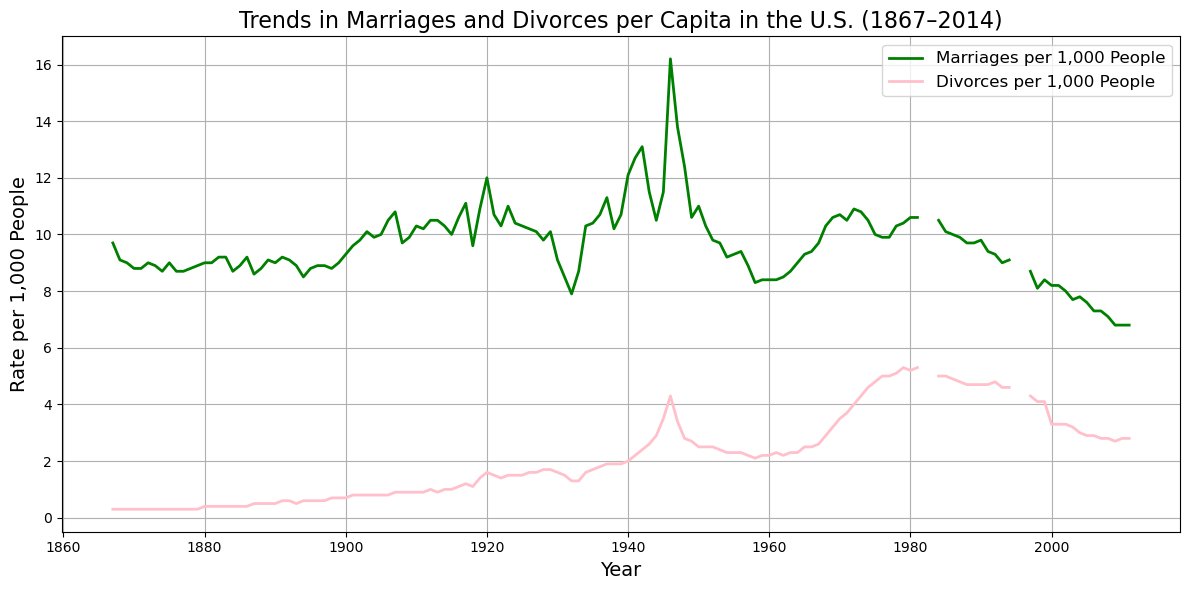

In [316]:

file_path = './us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)

# Plotting marriages and divorces per capita from 1867 to 2014
plt.figure(figsize=(12, 6))  
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1,000 People', color='green', linewidth=2)  
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1,000 People', color='pink', linewidth=2)  


plt.xlabel('Year', fontsize=14)  
plt.ylabel('Rate per 1,000 People', fontsize=14) 
plt.title('Trends in Marriages and Divorces per Capita in the U.S. (1867–2014)', fontsize=16)  

plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


### question 7

Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000. 
Don't forget to label your axes! 

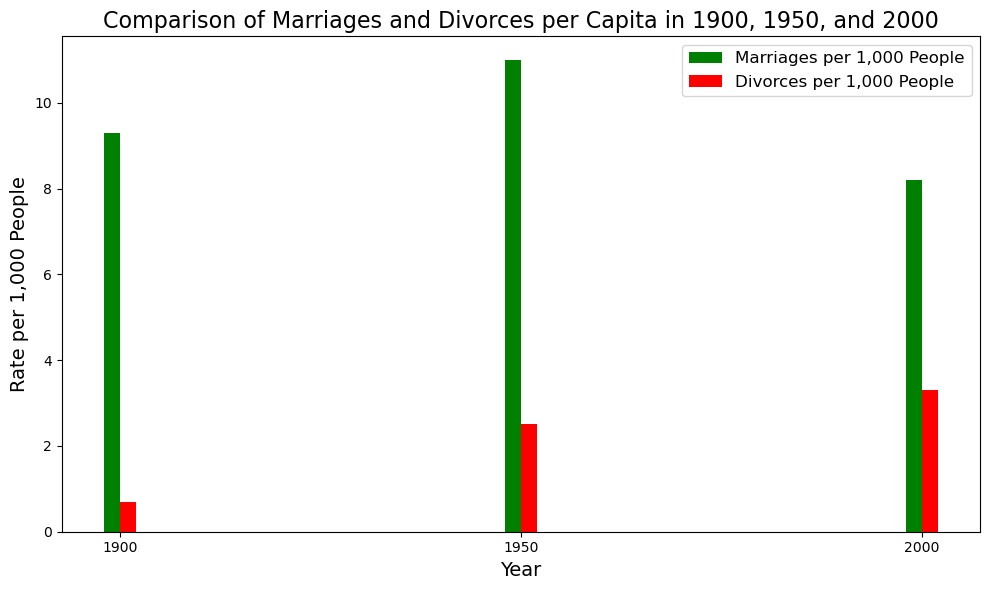

In [317]:
years_to_compare = [1900, 1950, 2000]
comparison_data = data[data['Year'].isin(years_to_compare)]

plt.figure(figsize=(10, 6))
bar_width = 2.0  
x = comparison_data['Year']

plt.bar(x - bar_width / 2, comparison_data['Marriages_per_1000'], width=bar_width, label='Marriages per 1,000 People', color='green')
plt.bar(x + bar_width / 2, comparison_data['Divorces_per_1000'], width=bar_width, label='Divorces per 1,000 People', color='red')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Rate per 1,000 People', fontsize=14)
plt.title('Comparison of Marriages and Divorces per Capita in 1900, 1950, and 2000', fontsize=16)

plt.xticks(years_to_compare)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


### question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name. 
Don't forget to label your axes!

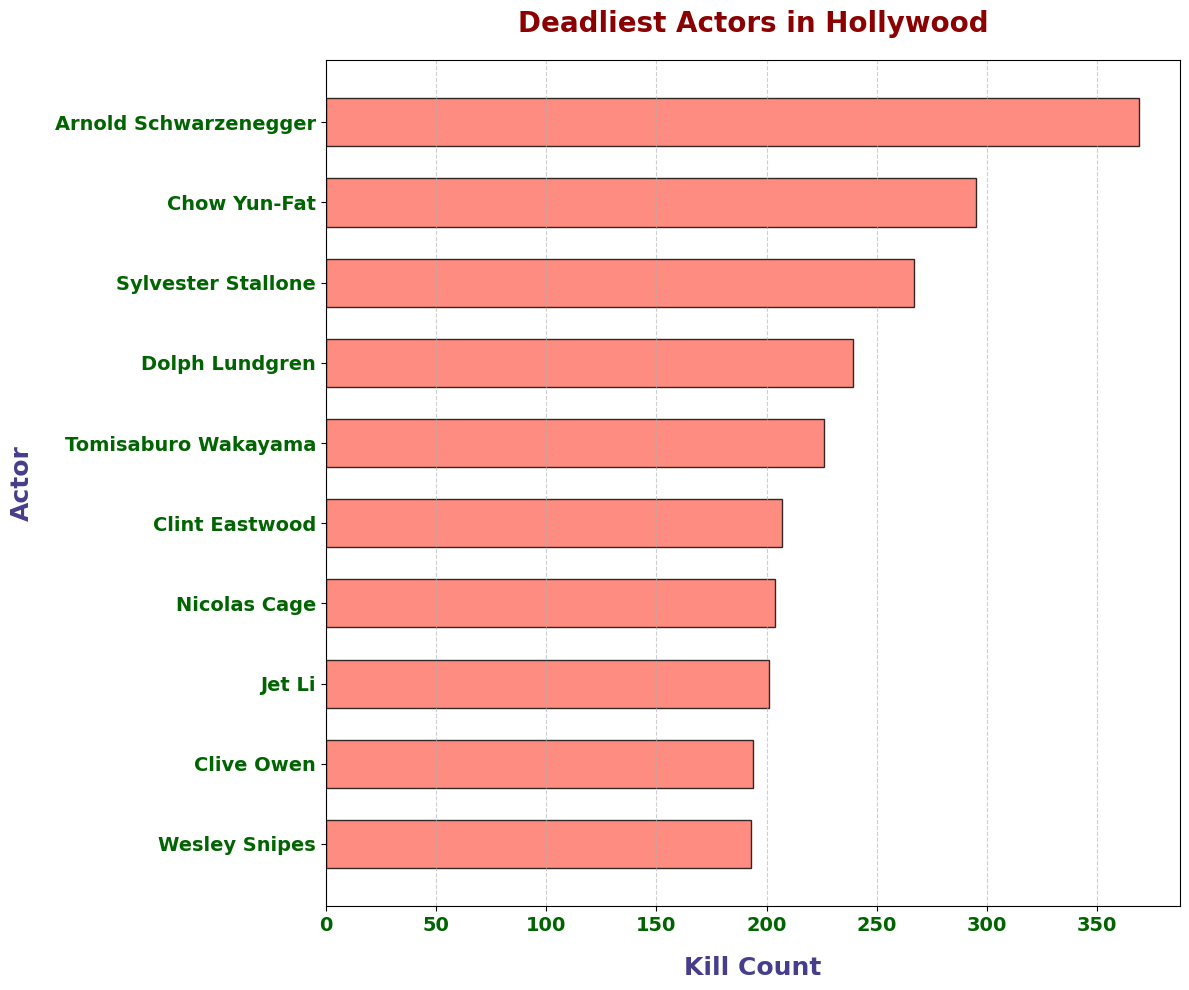

In [318]:

file_path = './actor_kill_counts.csv'
actor_kill_data = pd.read_csv(file_path)

sorted_actor_kill_data = actor_kill_data.sort_values(by='Count', ascending=False)
plt.figure(figsize=(12, 10))
plt.barh(sorted_actor_kill_data['Actor'], sorted_actor_kill_data['Count'], color='#FF6F61', edgecolor='black', height=0.6, alpha=0.8)

plt.xlabel('Kill Count', fontsize=18, fontweight='bold', color='darkslateblue', labelpad=15)
plt.ylabel('Actor', fontsize=18, fontweight='bold', color='darkslateblue', labelpad=15)
plt.title('Deadliest Actors in Hollywood', fontsize=20, fontweight='bold', color='darkred', pad=20)
plt.xticks(fontsize=14, fontweight='bold', color='darkgreen')
plt.yticks(fontsize=14, fontweight='bold', color='darkgreen')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()


### Question 9
Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated. 
 
Make sure that the pie chart is an even circle, labels the categories, and shows the 
percentage breakdown of the categories.

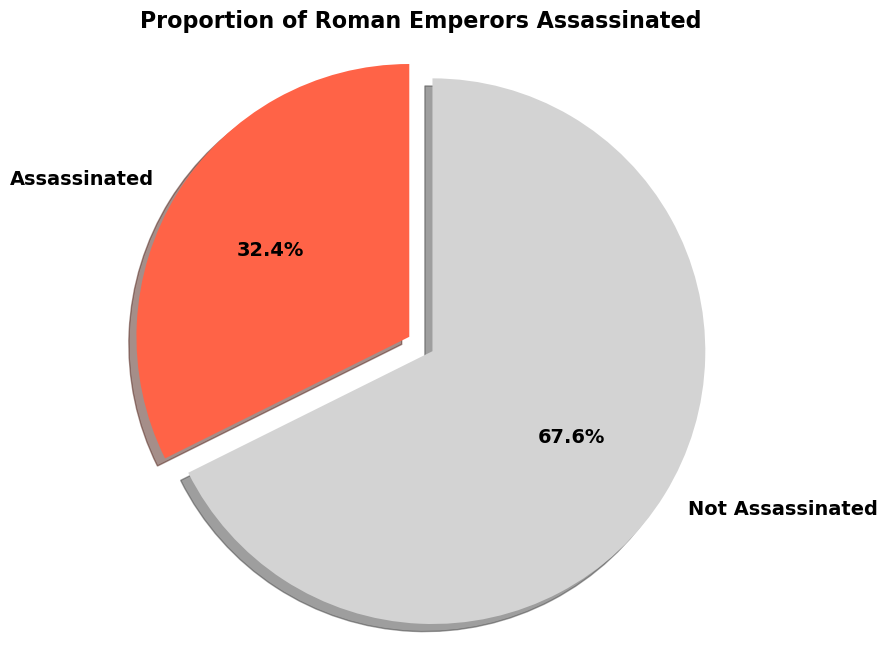

In [319]:

file_path = 'roman-emperor-reigns.csv'
data = pd.read_csv(file_path)


assassinated_count = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]
total_count = data.shape[0]

categories = ['Assassinated', 'Not Assassinated']
proportions = [assassinated_count, total_count - assassinated_count]
colors = ['#FF6347', '#D3D3D3']  
explode = (0.1, 0)  


plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True, textprops={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Proportion of Roman Emperors Assassinated', fontsize=16, fontweight='bold')
plt.axis('equal')  
plt.show()


### Question 10 

Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009. 
 
Don't forget to label your axes! 
Color each dot according to its year. 

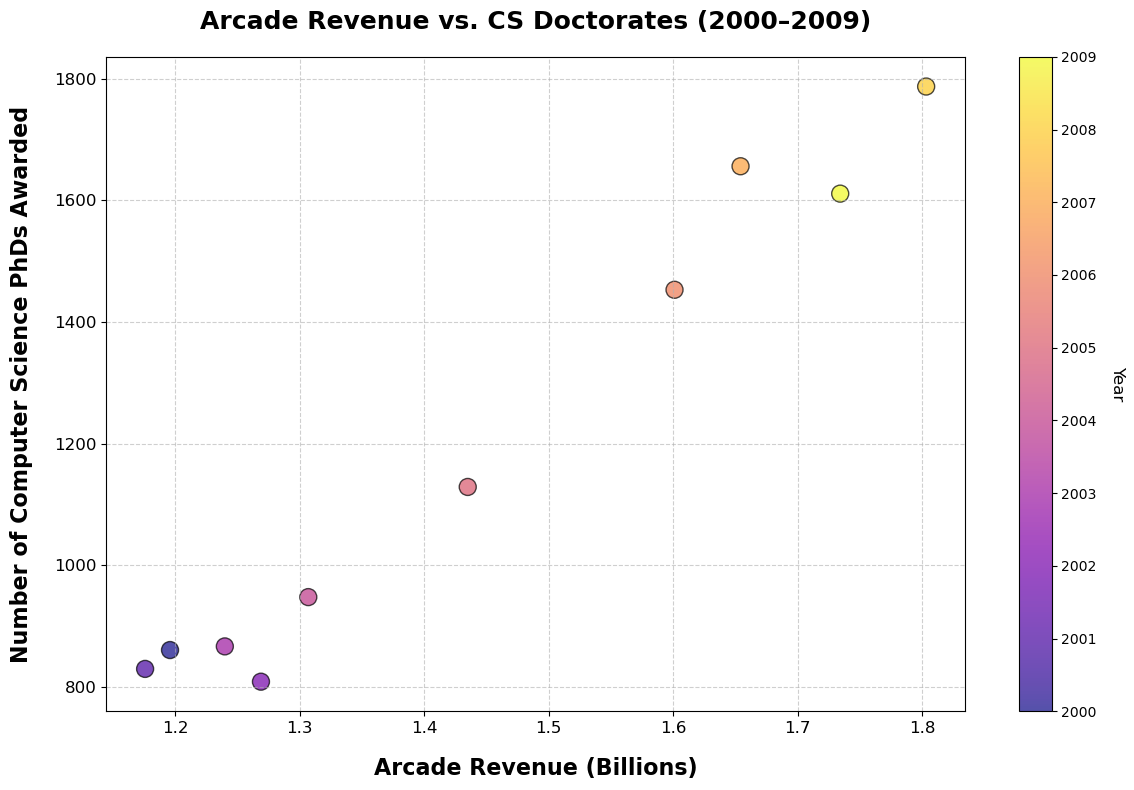

In [320]:

file_path = 'arcade-revenue-vs-cs-doctorates.csv'  
data = pd.read_csv(file_path)


arcade_revenue = data['Total Arcade Revenue (billions)'] 
cs_phds = data['Computer Science Doctorates Awarded (US)']  
year_data = data['Year']  

plt.figure(figsize=(12, 8))

scatter = plt.scatter(arcade_revenue, cs_phds, c=year_data, cmap='plasma', edgecolor='black', s=150, alpha=0.7)


colorbar = plt.colorbar(scatter)
colorbar.set_label('Year', fontsize=12, rotation=270, labelpad=20)

plt.xlabel('Arcade Revenue (Billions)', fontsize=16, fontweight='bold', labelpad=15)
plt.ylabel('Number of Computer Science PhDs Awarded', fontsize=16, fontweight='bold', labelpad=15)
plt.title('Arcade Revenue vs. CS Doctorates (2000–2009)', fontsize=18, fontweight='bold', pad=20)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()
